In [1]:
%load_ext autoreload
%autoreload 2

%matplotlib inline

In [2]:
import os
import re
import time

import numpy as np
import matplotlib.pyplot as plt

from utils.data_utils import im_path_to_arr
from utils.process_rtog_nii import process_rtog_nii

In [3]:
plt.rcParams["figure.figsize"] = 12, 9

In [4]:
scratch_folder = '/local-scratch/rsub_scratch/rtog'
patient_number = '101'

# Run preprocessing on one image

In [5]:
def run_preprocessing(scratch_folder, patient_number):
    process_rtog_nii(scratch_folder,
                 input_t1c_filename=patient_number + 't1c.nii',
                 output_t1c_filename=patient_number + 't1c_proc.nii',
                 input_flair_filename=patient_number + 'flair.nii',
                 output_flair_filename=patient_number + 'flair_proc.nii')

In [6]:
start = time.time()
run_preprocessing(scratch_folder, patient_number)
end = time.time()
print()
print('Preprocessing took {} seconds.'.format(end-start))

fsl_anat -i /local-scratch/rsub_scratch/rtog/101t1c.nii -o /local-scratch/rsub_scratch/rtog/tmp/T1 -t T1 --noreg --nononlinreg --noseg --nosubcortseg
fsl_anat -i /local-scratch/rsub_scratch/rtog/101flair.nii -o /local-scratch/rsub_scratch/rtog/tmp/T2 -t T2 --noreg --nononlinreg --noseg --nosubcortseg
bet /local-scratch/rsub_scratch/rtog/t1c_fsl_anat.nii /local-scratch/rsub_scratch/rtog/t1c_bet.nii -f 0.5 -g 0.0
bet /local-scratch/rsub_scratch/rtog/flair_fsl_anat.nii /local-scratch/rsub_scratch/rtog/flair_bet.nii -f 0.5 -g 0.0
reg_aladin -ref /local-scratch/rsub_scratch/rtog/t1c_bet.nii.gz -flo /local-scratch/rsub_scratch/rtog/flair_bet.nii.gz -aff /home/rsub/workspace/tumor_seg/rtog/reg.txt -res /local-scratch/rsub_scratch/rtog/flair_reg_aladin.nii -rigOnly

Preprocessing took 733.4643940925598 seconds.


# Viz preprocessing results on one image

In [7]:
def viz_preprocessing_results(scratch_folder, patient_number):
    fig, axes = plt.subplots(4, 4)

    for i, imtype in enumerate(['t1c', 't1c_proc', 'flair', 'flair_proc']):
        impath = os.path.join(scratch_folder, str(patient_number) + imtype + '.nii')
        arr = np.nan_to_num(im_path_to_arr(impath))

        step = int(len(arr) / 4)
        idxs = [int(step / 2 + sl * step) for sl in range(4)]
        for k, idx in enumerate(idxs):
            ax = axes[k, i]
            ax.imshow(arr[idx], cmap='viridis', vmin=0, vmax=arr.max())
            ax.axis('off')
        
    plt.tight_layout()
    plt.suptitle(str(patient_number))
    plt.show()

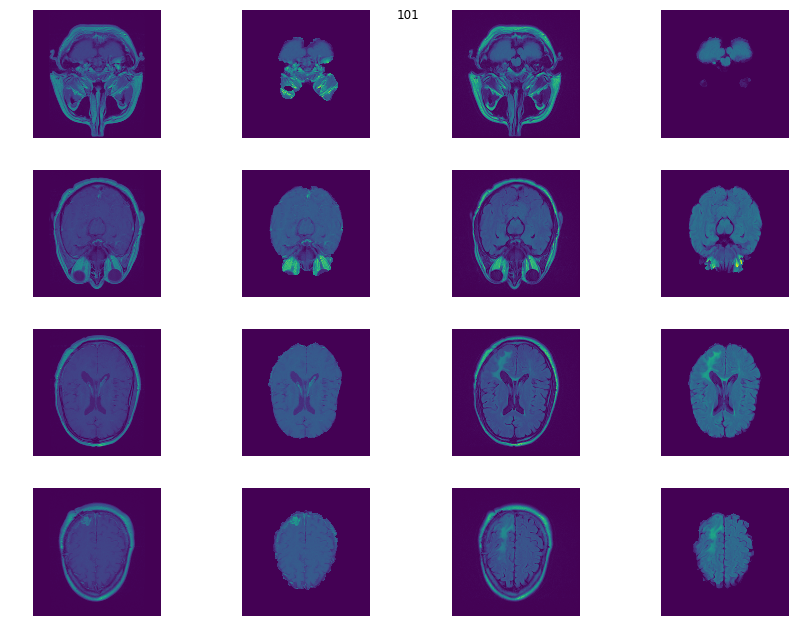

In [8]:
viz_preprocessing_results(scratch_folder, patient_number)

# Preprocess everything

In [65]:
scratch_folder = '/local-scratch/rsub_scratch/rtog'

In [12]:
patient_numbers = []
i = 0
for item in os.listdir(scratch_folder):
    if os.path.isfile(os.path.join(scratch_folder, item)):
        patient_number = re.findall('\d+', item)[0]
        if patient_number not in patient_numbers:
            patient_numbers.append(patient_number)
            i += 1
            print(i, patient_number)
            #run_preprocessing(scratch_folder, patient_number)
            if not i % 10:
                print('vizzing')
                #viz_preprocesing_results(scratch_folder, patient_number)

1 101
2 102
3 105
4 111
5 113
6 115
7 118
8 119
9 121
10 122
vizzing
11 123
12 125
13 129
14 137
15 138
16 142
17 144
18 145
19 146
20 149
vizzing
21 150
22 151
23 153
24 158
25 160
26 167
27 168
28 16
29 170
30 173
vizzing
31 175
32 177
33 179
34 180
35 193
36 195
37 201
38 202
39 20
40 216
vizzing
41 218
42 21
43 220
44 224
45 226
46 228
47 230
48 232
49 233
50 235
vizzing
51 236
52 23
53 244
54 245
55 247
56 259
57 25
58 262
59 269
60 273
vizzing
61 274
62 275
63 27
64 289
65 293
66 295
67 306
68 316
69 318
70 326
vizzing
71 333
72 335
73 338
74 351
75 355
76 358
77 374
78 381
79 387
80 393
vizzing
81 417
82 424
83 42
84 454
85 456
86 458
87 465
88 466
89 46
90 473
vizzing
91 474
92 476
93 47
94 481
95 488
96 48
97 501
98 503
99 504
100 506
vizzing
101 512
102 513
103 514
104 516
105 526
106 52
107 532
108 534
109 535
110 53
vizzing
111 545
112 54
113 550
114 553
115 558
116 559
117 55
118 560
119 56
120 582
vizzing
121 588
122 589
123 590
124 592
125 593
126 594
127 595
128 5
129 6